# Proyek Analisis Data: E-Commerce Public Dataset

Nama: Taswiyah Marsyah Noor <br>
Email: taswiyah2908@gmail.com <br>
Username Dicoding: taswiyahmn

# Pertanyaan Bisnis

1. Wilayah mana saja yang memiliki tingkat minat beli tertinggi (10 besar)?  <br>
2. Berapa rata-rata interval waktu yang dibutuhkan pelanggan untuk melakukan pembelian ulang?  <br>
3. Apakah terdapat pola tertentu dalam pembelian berdasarkan lokasi pelanggan?

### Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Wrangling

## Gathering Data

In [3]:
orders_item_df = pd.read_csv('order_items_dataset.csv')
orders_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
customer_df = pd.read_csv('customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Melakukan merging data dari 3 tabel terpilih

In [6]:
merge_df1 = pd.merge(orders_item_df, orders_df, how="left", on="order_id")
final_merge = pd.merge(merge_df1, customer_df, how="left", on="customer_id")
print(final_merge.shape)
final_merge.head

(112650, 18)


<bound method NDFrame.head of                                 order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abb

hasil dari dilakukan merging data terhadap **3 tabel yaitu orders_item_df, orders_df dan customer_df**, dengan menggunakan **order_id dan Customer_id** sebagai FK nya agar sesuai

## Assessing Data

In [7]:
final_merge.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [8]:
final_merge.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650,112650,112650,112635,111456,110196,112650,112650,112650.000000,112650,112650
unique,98666,NaN,32951,3095,93318,NaN,NaN,98666,7,98112,90174,81017,95664,450,95420,NaN,4110,27
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP
freq,21,NaN,527,2033,21,NaN,NaN,21,110197,21,23,48,21,604,24,NaN,17808,47449
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35119.309090,NaN,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29866.120801,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24340.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59028.750000,NaN,NaN


Menampilkan seluruh data yang ada pada dataframe termasuk yang non-numerik

In [9]:
final_merge["order_status"].unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

## Cleaning Data

In [10]:
final_merge = final_merge.drop(columns=['customer_zip_code_prefix','shipping_limit_date', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_id', 'order_item_id', 'seller_id', 'shipping_limit_date'])

Melakukan penghapusan beberapa kolom yang tidak dibutuhkan dalam proses analisis nanti dan hanya menyisakan kolom-kolom yang penting saja

In [11]:
final_merge = final_merge.drop(final_merge[final_merge['order_status'].isin(['canceled', 'unavailable', 'invoiced'])].index)
final_merge.sample(5)

,order_id,product_id,price,freight_value,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
67875,9b2d0b62b218b964a7d93e0df5e07b7f,0152f69b6cf919bcdaf117aa8c43e5a2,17.90,12.79,delivered,2018-08-20 14:10:04,7fc320a0e1bcf740b04279d20e90f096,diadema,SP
106474,f1faa948ad7764d64dff89bdcd2b88fa,9a7c0784b8058269d176b3089c946ed0,54.99,19.35,shipped,2018-03-21 22:02:42,b748d4f5d3080ce97dd1ec2f71e5cb1d,belo horizonte,MG
2335,054df8d1a5ab3cf520be20c25d98f5f4,87a71ae93900ab55fcf685c8040769b3,12.90,17.06,delivered,2018-05-12 01:51:06,aad88ea0262f4c77db76d3870cf28a2e,salvador,BA
26903,3d34d8e3ea34d73617a75deea86ced48,99a4788cb24856965c36a24e339b6058,89.90,16.26,delivered,2017-11-30 11:05:02,503f8e014d74b09cfe772d0279c361b9,sao paulo,SP
110700,fb87b2f1cfc7b5cbab3f7bd911bab6ca,cb8cd725d42cb2362a6069f76e50aac6,271.99,18.05,delivered,2017-04-05 20:53:42,901a3eeb0f9e5fb7ee01b7d2bde44cf0,ribeirao preto,SP


Memilih data dengan **order_status** yang bernilai **'delivered', 'shipped', 'processing', atau 'approved'**, karena status lainnya menunjukkan bahwa pesanan belum dibuat atau dibatalkan. Oleh karena itu, pesanan yang tidak terealisasi tidak diperlukan dalam analisis.

In [12]:
# Ensure column is in datetime format
final_merge["order_purchase_timestamp"] = pd.to_datetime(final_merge["order_purchase_timestamp"])

# Create a new column with the format YYYY-MM-DD
final_merge["order_date"] = final_merge["order_purchase_timestamp"].dt.strftime('%Y-%m-%d')

# Drop the original timestamp column
final_merge = final_merge.drop(columns=["order_purchase_timestamp"])

# EDA

In [13]:
# Check result
print(final_merge.head())

                           order_id                        product_id   price  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   58.90   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f  239.90   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd  199.00   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   12.99   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089  199.90   

   freight_value order_status                customer_unique_id  \
0          13.29    delivered  871766c5855e863f6eccc05f988b23cb   
1          19.93    delivered  eb28e67c4c0b83846050ddfb8a35d051   
2          17.87    delivered  3818d81c6709e39d06b2738a8d3a2474   
3          12.79    delivered  af861d436cfc08b2c2ddefd0ba074622   
4          18.14    delivered  64b576fb70d441e8f1b2d7d446e483c5   

           customer_city customer_state  order_date  
0  campos dos goytacazes             RJ  2017-09-13  
1 

In [14]:
final_merge.isna().sum()

order_id              0
product_id            0
price                 0
freight_value         0
order_status          0
customer_unique_id    0
customer_city         0
customer_state        0
order_date            0
dtype: int64

In [15]:
# Hitung jumlah order berdasarkan status tertentu
selected_statuses = ['delivered', 'shipped', 'processing', 'approved']
order_status_counts = final_merge[final_merge["order_status"].isin(selected_statuses)]["order_status"].value_counts()

# Tampilkan hasil
print(order_status_counts)

order_status
delivered     110197
shipped         1185
processing       357
approved           3
Name: count, dtype: int64


Berdasarkan order_status yang terpilih bawah delivered lebih banyak mencapai **110197**

In [16]:
# Hitung jumlah customer unik per state
customer_per_state = final_merge.groupby("customer_state")["customer_unique_id"].nunique().sort_values(ascending=False)

print("Jumlah Customer per State:")
print(customer_per_state)

Jumlah Customer per State:
customer_state
SP    39594
RJ    12216
MG    11096
RS     5216
PR     4810
SC     3490
BA     3235
DF     2054
ES     1946
GO     1930
PE     1596
CE     1300
PA      943
MT      871
MA      713
MS      687
PB      515
PI      474
RN      471
AL      397
SE      337
TO      271
RO      233
AM      142
AC       77
AP       67
RR       44
Name: customer_unique_id, dtype: int64


In [17]:
# Hitung rata-rata belanja tiap state
avg_spending_per_state = final_merge.groupby("customer_state")["price"].mean()

# Tampilkan hasil
print(avg_spending_per_state)

customer_state
AC    173.727717
AL    181.461674
AM    135.496000
AP    164.320732
BA    133.811563
CE    153.502417
DF    125.627206
ES    121.100437
GO    124.000725
MA    145.762616
MG    120.142753
MS    142.430416
MT    146.927379
PA    165.333630
PB    191.696644
PE    144.461949
PI    160.772262
PR    118.261036
RJ    124.749244
RN    156.965936
RO    166.328406
RR    151.753725
RS    119.224497
SC    124.408591
SE    153.382682
SP    109.371353
TO    157.350287
Name: price, dtype: float64


# Visualization & Explanatory Analysis

## Wilayah mana saja yang memiliki tingkat minat beli tertinggi (10 besar)?

                total_buyers  total_spent
customer_state                           
SP                   39594.0   5136406.84
RJ                   12216.0   1806493.80
MG                   11096.0   1565219.78
RS                    5216.0    737641.96
PR                    4810.0    674442.69
SC                    3490.0    515673.61
BA                    3235.0    505272.46
DF                    2054.0    300751.53
GO                    1930.0    287433.68
ES                    1946.0    271749.38
PE                    1596.0    259453.66
CE                    1300.0    226109.06
PA                     943.0    178064.32
MT                     871.0    154714.53
MA                     713.0    119233.82
MS                     687.0    116365.65
PB                     515.0    114826.29
PI                     474.0     86013.16
RN                     471.0     83034.98
AL                     397.0     80206.06
SE                     337.0     58898.95
TO                     271.0     4

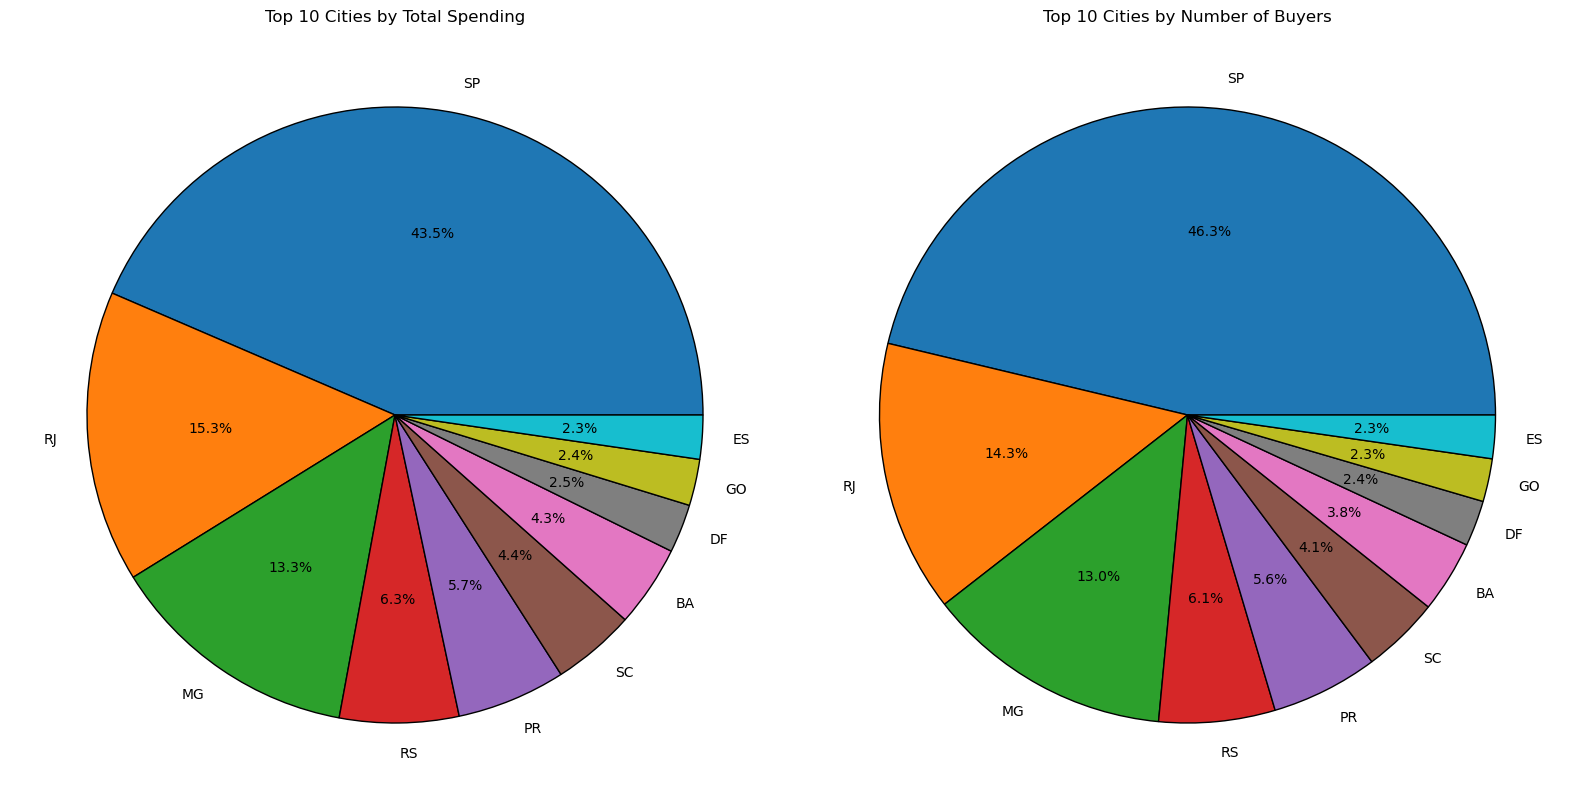

In [18]:
city_purchase_data = final_merge.groupby("customer_state").agg(
    total_spent=("price", "sum"),
    total_buyers=("customer_unique_id", "nunique") 
).reset_index()

pivot_table = city_purchase_data.pivot_table(index="customer_state", values=["total_spent", "total_buyers"])
pivot_table = city_purchase_data.pivot_table(index="customer_state", values=["total_spent", "total_buyers"])

# Urutkan berdasarkan total_spent dari tertinggi ke terendah
pivot_table = pivot_table.sort_values(by="total_spent", ascending=False)

# Tampilkan hasil
print(pivot_table)


# Sort by total spending and take the top 10 cities
top_cities = city_purchase_data.sort_values(by="total_spent", ascending=False).head(10)

# ----- Visualization -----
plt.figure(figsize=(16, 8))  # Bigger figure size

# Pie chart for total spending
plt.subplot(1, 2, 1)
plt.pie(top_cities["total_spent"], labels=top_cities["customer_state"], autopct="%1.1f%%",
        wedgeprops={'edgecolor': 'black'})  # Improves visibility
plt.title("Top 10 Cities by Total Spending")

# Pie chart for total buyers
plt.subplot(1, 2, 2)
plt.pie(top_cities["total_buyers"], labels=top_cities["customer_state"], autopct="%1.1f%%",
        wedgeprops={'edgecolor': 'black'})  # Improves visibility
plt.title("Top 10 Cities by Number of Buyers")

# Show the charts
plt.tight_layout()
plt.show()

Berdasarkan hasil pie chart yang diberikan, dapat dilihat bahwa negara bagian **São Paulo (SP)** memiliki total pengeluaran (total spending) terbesar serta jumlah pembeli terbanyak, masing-masing mencapai **43,5% dan 46,3%**. Sementara itu, dari 10 negara bagian dengan pembelian terbesar, **Espirito Santo (ES)** mencatat persentase terkecil, **yaitu hanya 2,3%.**

berikut urutan nama state
"AC" : "Acre",
"AL" : "Alagoas",
"AM" : "Amazonas",
"AP" : "Amapa",
"BA" : "Bahia",
"CE" : "Ceara",
"DF" : "Distrito Federal",
"ES" : "Espirito Santo",
"GO" : "Goias",
"MA" : "Maranhao",
"MG" : "Minas Gerais",
"MS" : "Mato Grosso do Sul",
"MT" : "Mato Grosso",
"PA" : "Para",
"PB" : "Paraiba",
"PE" : "Pernambuco",
"PI" : "Piaui",
"PR" : "Parana",
"RJ" : "Rio de Janeiro",
"RN" : "Rio Grande do Norte",
"RO" : "Rondonia",
"RR" : "Roraima",
"RS" : "Rio Grande do Sul",
"SC" : "Santa Catarina",
"SE" : "Sergipe",
"SP" : "Sao Paulo",
"TO" : "Tocantins"

# Berapa rata-rata interval waktu yang dibutuhkan pelanggan untuk melakukan pembelian ulang?

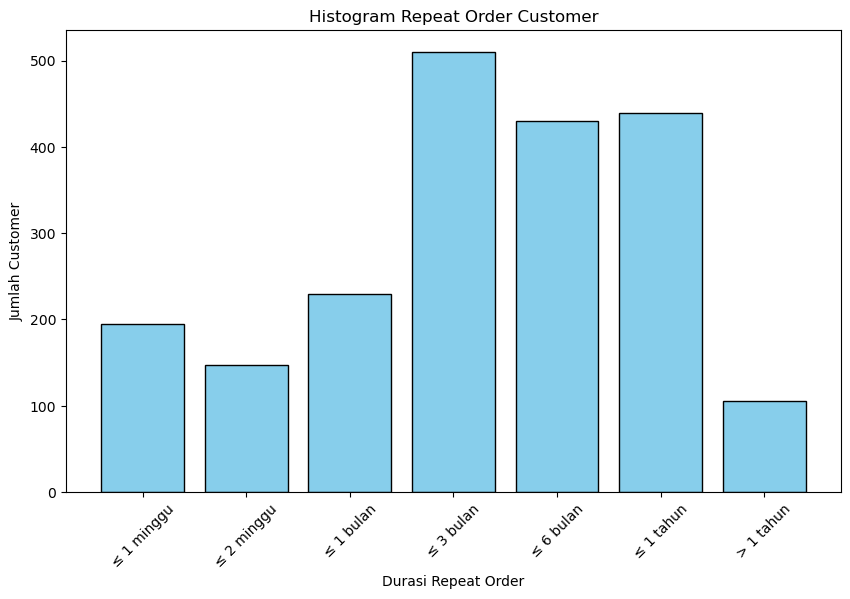

In [19]:
# Pastikan order_purchase_timestamp dalam format datetime
final_merge["order_date"] = pd.to_datetime(final_merge["order_date"])

# Hitung jumlah order per customer
customer_orders = final_merge.groupby("customer_unique_id").agg(
    first_purchase=("order_date", "min"),
    last_purchase=("order_date", "max"),
    total_orders=("order_id", "count")
).reset_index()

# Hitung rentang waktu antara pembelian pertama dan terakhir dalam hari
customer_orders["order_span_days"] = (customer_orders["last_purchase"] - customer_orders["first_purchase"]).dt.days

# Buat kategori repeat order berdasarkan durasi
bins = [0, 7, 14, 30, 90, 180, 365, float('inf')]
labels = ["≤ 1 minggu", "≤ 2 minggu", "≤ 1 bulan", "≤ 3 bulan", "≤ 6 bulan", "≤ 1 tahun", "> 1 tahun"]

customer_orders["repeat_order_category"] = pd.cut(customer_orders["order_span_days"], bins=bins, labels=labels)

# Hitung jumlah customer per kategori
repeat_order_counts = customer_orders["repeat_order_category"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(repeat_order_counts.index, repeat_order_counts.values, color='skyblue', edgecolor='black')

# Tambahkan label dan judul
plt.xlabel("Durasi Repeat Order")
plt.ylabel("Jumlah Customer")
plt.title("Histogram Repeat Order Customer")
plt.xticks(rotation=45)  # Putar label agar lebih mudah dibaca

# Tampilkan grafik
plt.show()


Berdasarkan histogram yang disajikan, terlihat bahwa pelanggan cenderung melakukan repeat order dalam rentang waktu sekitar **tiga bulan hingga kurang dari satu tahun setelah pembelian pertama mereka.** Pola ini menunjukkan bahwa mayoritas pelanggan membutuhkan beberapa bulan sebelum melakukan pembelian ulang, dengan kemungkinan adanya faktor seperti kebutuhan produk, pengalaman sebelumnya, atau strategi pemasaran yang memengaruhi keputusan mereka untuk kembali bertransaksi.

# Apakah terdapat pola tertentu dalam pembelian berdasarkan lokasi pelanggan?

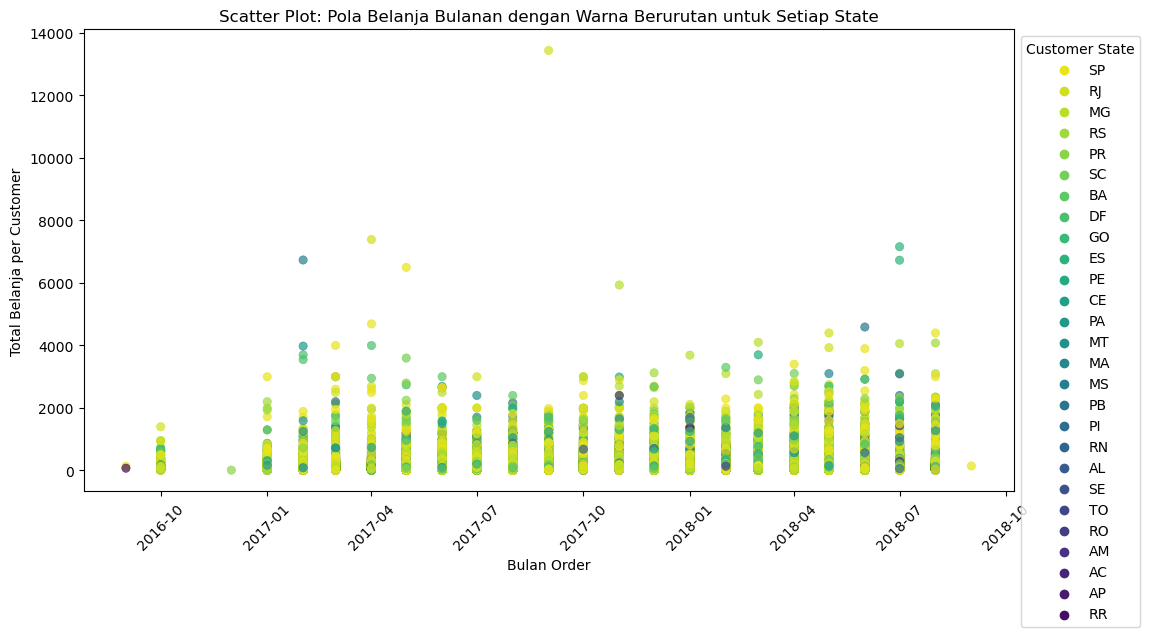

In [20]:
# Ambil hanya data yang diperlukan
df = final_merge.groupby([final_merge["order_date"].dt.to_period("M"), "customer_unique_id", "customer_state"]).agg(
    total_spent=("price", "sum")  # Total spending per customer per month
).reset_index()

# Konversi kembali order_date ke format datetime agar bisa diplot
df["order_date"] = df["order_date"].dt.to_timestamp()

# Hitung total belanja per state untuk menentukan urutan warna
state_spending = df.groupby("customer_state")["total_spent"].sum().sort_values(ascending=False)

# Urutkan state berdasarkan total belanja (terbesar di awal)
df["customer_state"] = df["customer_state"].astype("category")
df["customer_state"] = df["customer_state"].cat.set_categories(state_spending.index)

# Buat palet warna dengan urutan sesuai total belanja (gelap untuk belanja tertinggi)
palette = sns.color_palette("viridis", n_colors=len(state_spending))[::-1]  # Membalik warna

# Buat scatter plot
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=df["order_date"], 
    y=df["total_spent"], 
    hue=df["customer_state"], 
    palette=dict(zip(state_spending.index, palette)),  # Warna mengikuti urutan total belanja
    alpha=0.7, 
    edgecolor=None
)

# Tambahkan label dan judul
plt.xlabel("Bulan Order")
plt.ylabel("Total Belanja per Customer")
plt.title("Scatter Plot: Pola Belanja Bulanan dengan Warna Berurutan untuk Setiap State")
plt.xticks(rotation=45)  # Putar label agar lebih jelas
plt.legend(title="Customer State", bbox_to_anchor=(1, 1))  # Geser legenda ke samping

# Tampilkan grafik
plt.show()

Berdasarkan scatter plot yang ditampilkan, intensitas warna dari terang ke gelap menunjukkan jumlah transaksi, di mana warna terang menandakan jumlah pembelian yang lebih tinggi, sedangkan warna gelap menunjukkan jumlah yang lebih rendah. Ditemukan adanya **outlier**, yang berdasarkan keterangan berada di negara bagian **Rio de Janeiro (RJ)** dengan total pengeluaran hampir mencapai **1.400**.  

Sementara itu, pola distribusi transaksi per bulan menunjukkan tren yang cukup konsisten, di mana jumlah pembelian mengalami peningkatan, kemudian menurun, dan kembali meningkat secara berkala. Puncak transaksi terlihat terjadi pada **April 2017** dan **Juni 2018**.

# Conclusion

#### **Wilayah dengan Tingkat Minat Beli Tertinggi**  
Berdasarkan analisis *pie chart*, negara bagian **São Paulo (SP)** memiliki tingkat minat beli tertinggi, dengan total pengeluaran sebesar **43,5%** dan jumlah pembeli mencapai **46,3%**. Sebaliknya, dari 10 wilayah dengan pembelian terbesar, **Espirito Santo (ES)** memiliki proporsi terkecil, yaitu hanya **2,3%**. Hal ini menunjukkan bahwa **SP merupakan pusat aktivitas belanja terbesar**, sementara **ES memiliki kontribusi yang lebih rendah** dalam total transaksi.

#### **Rata-rata Interval Waktu Pembelian Ulang**  
Berdasarkan *histogram*, pelanggan umumnya melakukan **repeat order dalam rentang waktu tiga bulan hingga kurang dari satu tahun** setelah pembelian pertama. Hal ini mencerminkan pola pembelian yang **tidak terlalu sering tetapi tetap berulang dalam jangka waktu tertentu**.  
Faktor-faktor seperti **kebutuhan produk, pengalaman pelanggan, serta strategi pemasaran** yang diterapkan kemungkinan besar memengaruhi keputusan pelanggan untuk kembali bertransaksi dalam periode tersebut.

#### **Pola Pembelian Berdasarkan Lokasi Pelanggan**  
Analisis *scatter plot* menunjukkan bahwa jumlah transaksi **bervariasi berdasarkan lokasi**, di mana **warna terang mengindikasikan jumlah pembelian yang lebih tinggi**, sementara **warna gelap menunjukkan jumlah yang lebih rendah**.  
Terdapat **outlier di negara bagian Rio de Janeiro (RJ)** dengan total pengeluaran hampir **1.400**, yang menandakan adanya **aktivitas belanja yang sangat tinggi di beberapa kasus tertentu**.

Selain itu, pola transaksi per bulan menunjukkan tren yang cukup **konsisten**, dengan **fluktuasi yang berulang**—mengalami **kenaikan, lalu menurun, kemudian meningkat kembali**. **Puncak transaksi terjadi pada April 2017 dan Juni 2018**, yang mungkin disebabkan oleh **faktor musiman, promosi, atau perubahan tren belanja pelanggan** di periode tersebut.


In [21]:
# final_merge.to_csv('ecommerce_final.csv')